## Importing and Installing the required libraries

In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
import fastbook

In [3]:
fastbook.setup_book()
from fastbook import *

In [4]:
from fastai.vision.widgets import *

In [5]:
!pip install duckduckgo-search

In [6]:
pip show duckduckgo-search

Name: duckduckgo_search
Version: 7.2.0
Summary: Search for words, documents, images, news, maps and text translation using the DuckDuckGo.com search engine.
Home-page: https://github.com/deedy5/duckduckgo_search
Author: deedy5
Author-email: 
License: MIT License
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: click, lxml, primp
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Quick Test

In [8]:
import duckduckgo_search

# List available methods in the library
print(dir(duckduckgo_search))

['DDGS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'duckduckgo_search', 'exceptions', 'logging', 'utils', 'version']


In [9]:
from duckduckgo_search import DDGS

# Initialize the DDGS object
ddgs = DDGS()

# Perform an image search
query = "grizzly bear"
results = ddgs.images(query, max_results=150)

# Display the results
len(results)

150

In [10]:
print(results[0])

{'title': 'Grizzly Bear Basic Facts And New Pictures | The Wildlife', 'image': 'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg', 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP.Mw_Mi-jVWv9_0SNTuiGaSQHaE8&pid=Api', 'url': 'http://wildlifeanimalz.blogspot.com/2012/10/Grizzly-Bear.html', 'height': 1068, 'width': 1600, 'source': 'Bing'}


In [11]:
image_urls = []
for result in results:
    image_urls.append(result['image'])

image_urls

['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg',
 'https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg',
 'https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg',
 'http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg',
 'https://cdn.britannica.com/18/161718-050-2DB34DD6/Grizzly-bear.jpg',
 'https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg',
 'https://wallup.net/wp-content/uploads/2016/01/30094-bears-nature-animals-Grizzly_bear-Grizzly_Bears.jpg',
 'http://www.animalfactsencyclopedia.com/images/grizzlybearstanding.jpg',
 'https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg',
 'https://animalcorner.org/wp-content/uploads/2015/02/grizzly-bear-1.jpg',
 'http://4.bp.blogspot.com/-3WcCGQ1bzJI/UXcshw5QEwI/AAAAAAAAIns/gfJpUVE0FK8/s1600/Grizz

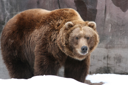

In [12]:
img = image_urls[0]
dest = 'images/grizzly.jpg'
download_url(img, dest)

im = Image.open(dest)
im.to_thumb(128,128)

## Main Work

In [14]:
bear_types = ['grizzly', 'black', 'teddy']
path = Path('bears')

In [15]:
def search_images(query):
    results = ddgs.images(query, max_results=150)
    image_urls = []
    for result in results:
        image_urls.append(result['image'])

    return image_urls

In [16]:

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} bear')
        download_images(dest, urls=results)

In [17]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#48) [Path('bears/grizzly/10d800ce-4df5-4f9a-9039-b2c38b2ea48e.jpg'),Path('bears/grizzly/d6ecfadc-fdf7-458e-9bd0-b43b832a91f0.jpg'),Path('bears/grizzly/8c746f19-aa3e-4111-b9b2-f30802fe056a.JPG'),Path('bears/grizzly/b7b48176-d94b-4f41-bc64-2330dcb5810a.jpg'),Path('bears/grizzly/8abab941-d152-4ba8-9ed5-e228cf37f3d5.jpg'),Path('bears/grizzly/fd4174d4-d5ff-4d60-89eb-319813b700cc.jpg'),Path('bears/grizzly/8e1ff134-d58c-4518-908d-9bbd50439015.jpg'),Path('bears/grizzly/14382aa2-2ed2-4ff8-a0b7-1ebde08e0652.jpg'),Path('bears/grizzly/3594858f-4b72-4767-8446-fccbf096a05e.jpg'),Path('bears/grizzly/10fdb22c-2b56-4bf4-b9c5-22c4a65fec58.JPG'),Path('bears/grizzly/ddf2332f-2776-4caf-8bfc-2040ed082422.jpg'),Path('bears/grizzly/2abcfa7b-8813-472a-82e3-7e9f0a9ec0e5.jpg'),Path('bears/grizzly/e50d8fcc-adee-4fd1-80de-302118104ac6.jpg'),Path('bears/grizzly/7ca8e1fa-9323-458c-9f1a-e6056f5360ec.jpg'),Path('bears/black/e08fcb96-f350-408d-be8e-b7bbaacdce5d.jpg'),Path('bears/black/c87a3d31-6fe5-4ddf-b0a3-9f0a0655

In [18]:
failed.map(Path.unlink);

## DataLoaders

In [20]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

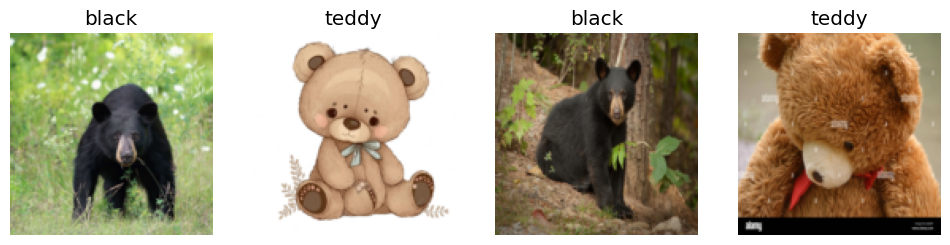

In [21]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

## Data Augmentation

In [23]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'  # Set the fallback before importing torch
import torch


In [24]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)

/opt/anaconda3/lib/python3.11/site-packages/torch/_tensor.py:1512: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  ret = func(*args, **kwargs)


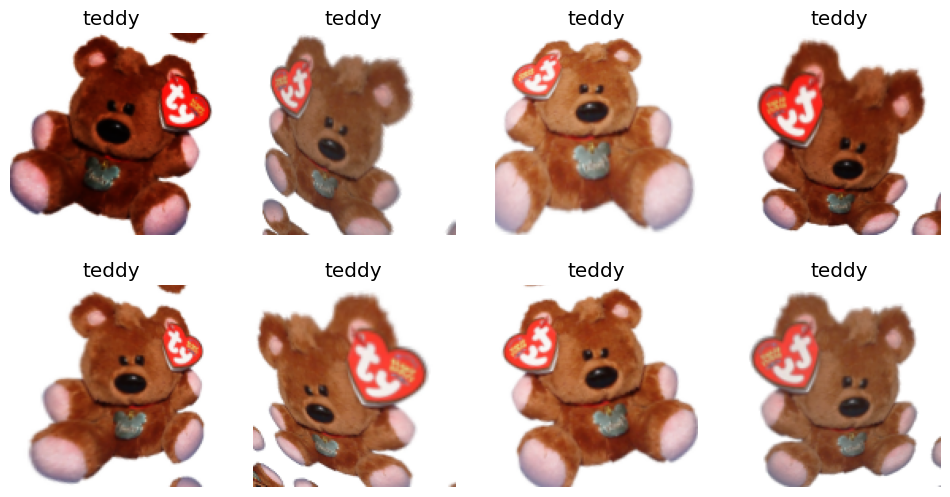

In [25]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training the model 

In [27]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [28]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.653090,0.287883,0.093333,00:18


/opt/anaconda3/lib/python3.11/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.314648,0.247890,0.053333,00:19
1,0.186763,0.349089,0.066667,00:18
2,0.133381,0.449067,0.066667,00:18
3,0.103031,0.468357,0.053333,00:17


## Exporting the model

In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

## Loading the model

In [33]:
learn_inf = load_learner(path/'export.pkl')

In [34]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([3.8879e-06, 9.9999e-01, 4.2570e-06]))

In [35]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

## Testing an Image

In [66]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

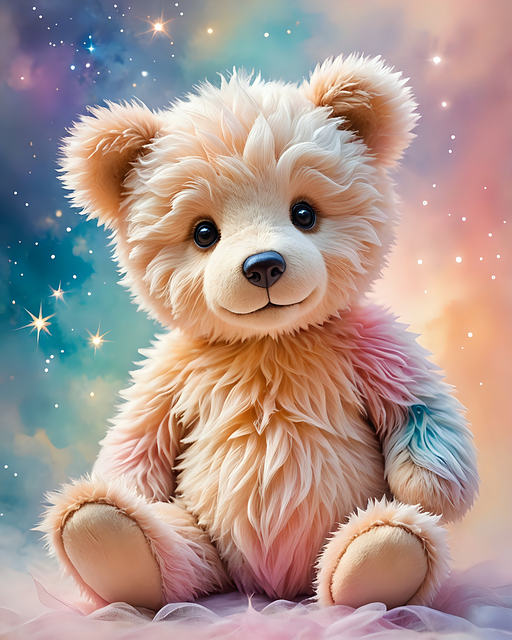

In [70]:
img = PILImage.create(btn_upload.data[-1])
img

In [72]:
pred,pred_idx,probs = learn_inf.predict(img)

In [74]:
pred

'teddy'

## Building a simple Notebook Interface

In [95]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [97]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [99]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 0.9999')

In [101]:
def classify_on_click(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(classify_on_click)

In [103]:
btn_upload = widgets.FileUpload()

In [105]:
VBox([widgets.Label('Select Your Bear'),
      btn_upload, btn_run, out_pl, lbl_pred])

## Turning Into Real App

In [118]:
!pip install voila

In [120]:
!jupyter server extension enable voila --sys-prefix

Extension package aext_assistant took 0.2443s to import
****************** ENVIRONMENT Environment.PRODUCTION ******************
****************** ENVIRONMENT Environment.PRODUCTION ******************
A `_jupyter_server_extension_points` function was not found in jupyter_lsp. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
A `_jupyter_server_extension_points` function was not found in notebook_shim. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
Extension package panel.io.jupyter_server_extension took 0.5539s to import
Extension package voila.server_extension took 0.1233s to import
Enabling: voila
- Writing config: /opt/anaconda3/etc/jupyter
    - Validating voila...
      voila  OK
    - Extension successfully enabled.
